## Machine Learning II

### Aplicar un modelo de regresion logistica haciendo previamente un masajeo de datos con imputación

#### I took the database from:
- https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv

#### - Importación del archivo de uso 

In [283]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 26')

# Se usa la funcion read_csv para leer el archivo . csv
# Tener en cuenta que esta vez el archivo tenia separadores el ;

df = pd.read_csv('bank-additional-full.csv',sep=';')

In [153]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [155]:
# Del ejercicio anterior se vio que las siguientes son las columnas que tienen valores desconocidos. 
# Solo que dichos valores no aparecen como nulos porque se les fue asignado el nombre 'unknown'
# Como se vera en el siguiente grafico.

columns_unknownvalues=['job', 'marital', 'education', 'default', 'housing', 'loan']

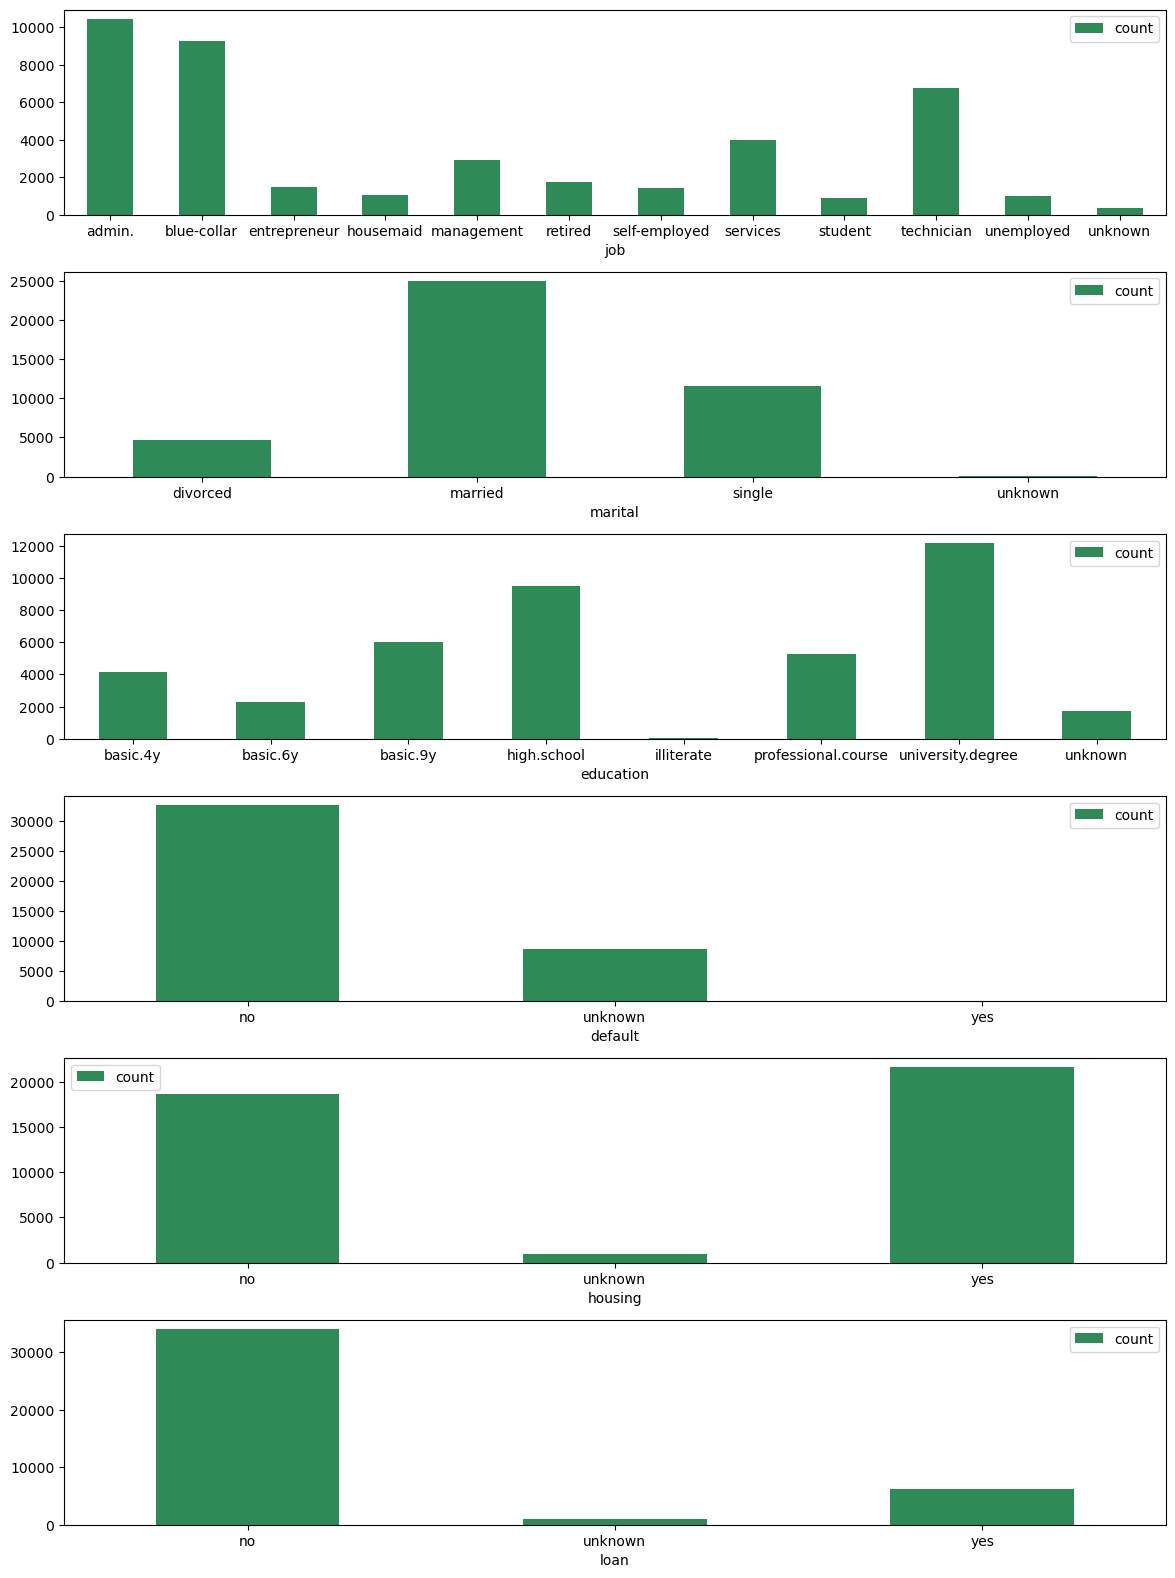

In [156]:
fig, axes = plt.subplots(nrows=6,ncols=1, figsize=(12,16))
fig.tight_layout(pad=2.0)
for i, column in enumerate (columns_unknownvalues):

    df_helper= df.groupby(column)[column].count().rename('count').reset_index()
    df_helper.plot.bar(x=column,ax=axes[i],color='seagreen')
    axes[i].tick_params(labelrotation=360) 

In [157]:
# La variable default es la que tiene el mayor tipo de valores desconocidos.
# En el ejercicio anterior lo que hice fue simplemente eliminar las columnas con valores desconocidos
# Ahora voy a utilizar el metoddo knn imputation para llevar a cabo la imputacion de los datos nulos.

### Field Engineering

#### Hacer que los valores nulos se muestren como nulos:

In [284]:
df.replace('unknown',np.nan,inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [161]:
missing_values_count = df.isnull().sum()

missing_values_count

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [285]:
# Se realiza una copia del dataset original para empezar a realizar el masajeo de datos
df1=df.copy()



In [163]:
df1.nunique().sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
nr.employed         11
job                 11
month               10
emp.var.rate        10
previous             8
education            7
day_of_week          5
poutcome             3
marital              3
default              2
contact              2
loan                 2
housing              2
y                    2
dtype: int64

### Cambiar el formato de las variables 'job', 'marital','education','month','day_of_week','poutcome' de object a categorical.

In [286]:
df1['job']= df1['job'].astype('category')
df1['marital']= df1['marital'].astype('category')
df1['education']= df1['education'].astype('category')
df1['month']= df1['month'].astype('category')
df1['day_of_week']= df1['day_of_week'].astype('category')
df1['poutcome']= df1['poutcome'].astype('category')

#### Cambiar el formato de las variables housing, loan, default, contact, y, de object a binary (int64).

In [287]:
df1.loc[df1["housing"] == "no", "housing"] = 0
df1.loc[df1["housing"] == "yes", "housing"] = 1
df1.loc[df1["loan"] == "no", "loan"] = 0
df1.loc[df1["loan"] == "yes", "loan"] = 1
df1.loc[df1["y"] == "no", "y"] = 0
df1.loc[df1["y"] == "yes", "y"] = 1
df1.loc[df1["default"] == "no", "default"] = 0
df1.loc[df1["default"] == "yes", "default"] = 1
df1.loc[df1["contact"] == "telephone", "contact"] = 0
df1.loc[df1["contact"] == "cellular", "contact"] = 1

In [288]:
df1['housing']= df1['housing'].astype('float')
df1['loan']= df1['loan'].astype('float')
df1['y']= df1['y'].astype('float')
df1['default']= df1['default'].astype('float')
df1['contact']= df1['contact'].astype('float')

In [289]:
df1.info()
# Ahora el dataframe no tien mas columnas de tipo object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             40858 non-null  category
 2   marital         41108 non-null  category
 3   education       39457 non-null  category
 4   default         32591 non-null  float64 
 5   housing         40198 non-null  float64 
 6   loan            40198 non-null  float64 
 7   contact         41188 non-null  float64 
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [281]:
# Ya no se tienen variables tipo objeto

#### Correlación

In [290]:
df1.corr().style.background_gradient(cmap='Greens')\
        .set_properties(**{'font-size':'10px'})

C:\Users\oscah\AppData\Local\Temp\ipykernel_5288\2296899345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().style.background_gradient(cmap='Greens')\


,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.002924,-0.001636,-0.007375,-0.007021,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
default,0.002924,1.000000,-0.004042,-0.004180,0.006760,-0.005752,-0.004207,0.002071,0.002419,0.005825,-0.002657,0.004990,0.006700,0.007258,-0.003689
housing,-0.001636,-0.004042,1.000000,0.046462,0.083022,-0.007806,-0.011168,-0.010649,0.021656,-0.060917,-0.081396,-0.034167,-0.059978,-0.046455,0.011662
loan,-0.007375,-0.004180,0.046462,1.000000,0.012078,-0.000207,0.005353,0.000050,-0.001924,0.001422,-0.004934,-0.013379,-0.000300,0.004183,-0.004682
contact,-0.007021,0.006760,0.083022,0.012078,1.000000,0.026657,-0.077368,-0.117970,0.212848,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.144773
duration,-0.000866,-0.005752,-0.007806,-0.000207,0.026657,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.004207,-0.011168,0.005353,-0.077368,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.002071,-0.010649,0.000050,-0.117970,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.002419,0.021656,-0.001924,0.212848,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.005825,-0.060917,0.001422,-0.393584,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334


#### Se eliminan las variables con alto coeficiente de correlacion

In [291]:
df1.drop(['emp.var.rate','euribor3m','duration'],axis=1,inplace=True)

# La variable duracion la eliminé por sugerencia del administración del dataset

In [171]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,0.00,0.00,0.00,0.00,may,mon,1,999,0,nonexistent,93.99,-36.40,5191.00,0.00
1,57,services,married,high.school,NaN,0.00,0.00,0.00,may,mon,1,999,0,nonexistent,93.99,-36.40,5191.00,0.00
2,37,services,married,high.school,0.00,1.00,0.00,0.00,may,mon,1,999,0,nonexistent,93.99,-36.40,5191.00,0.00
3,40,admin.,married,basic.6y,0.00,0.00,0.00,0.00,may,mon,1,999,0,nonexistent,93.99,-36.40,5191.00,0.00
4,56,services,married,high.school,0.00,0.00,1.00,0.00,may,mon,1,999,0,nonexistent,93.99,-36.40,5191.00,0.00


### Se buscan variables numéricas con un alto sesgo

In [299]:
cols_num=[col for col in df1.columns if (df1[col].dtypes=='float64') | (df1[col].dtypes=='int64')]
cols_num

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'y']

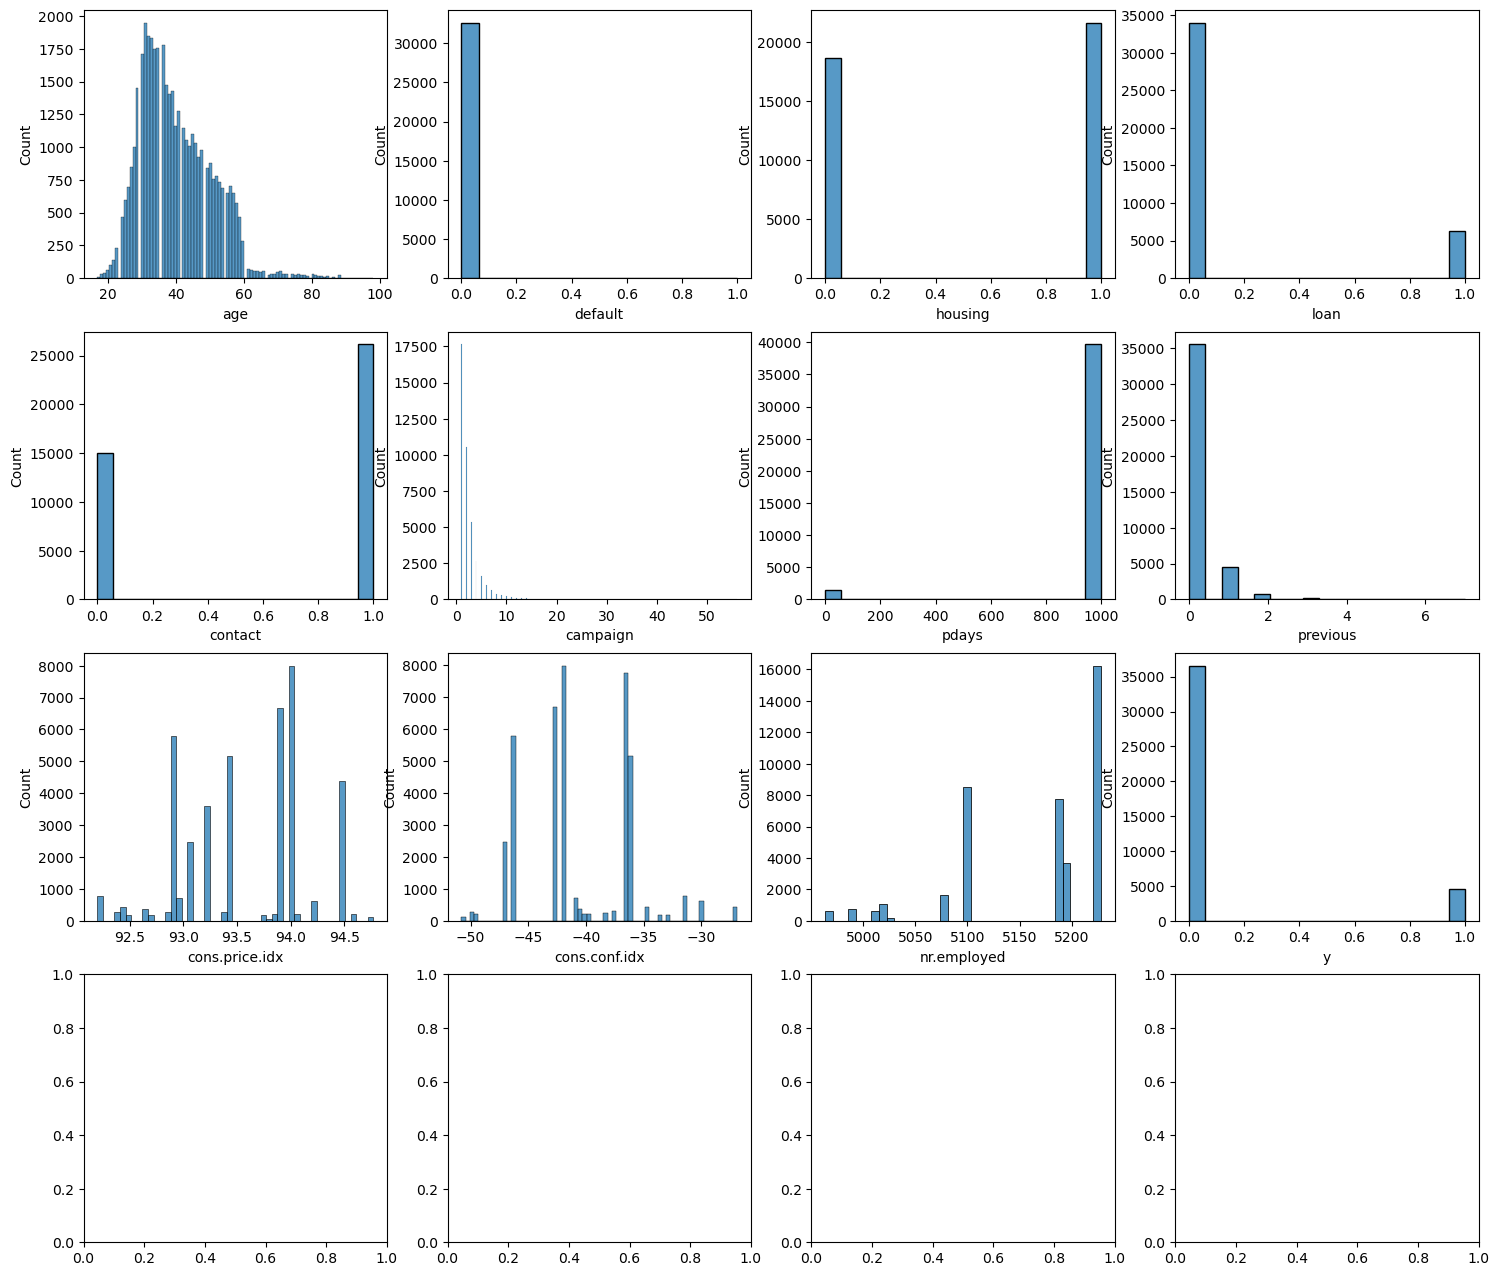

In [174]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate (cols_num):
    sns.histplot(df1[column],ax=axes[i//4,i%4],kde=False)

In [175]:
# Las variables age y campaign tienen un sesgo significativo hacia la derecha por lo cual 
# es pertinente usar logaritmo.

In [300]:
df1['age-log']=np.log(df1['age']+1)
df1['campaign-log']=np.log(df1['campaign']+1)

In [301]:
cols_num=[col for col in df1.columns if (df1[col].dtypes=='float64') | (df1[col].dtypes=='int64')]
cols_num

['age',
 'default',
 'housing',
 'loan',
 'contact',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'y',
 'age-log',
 'campaign-log']

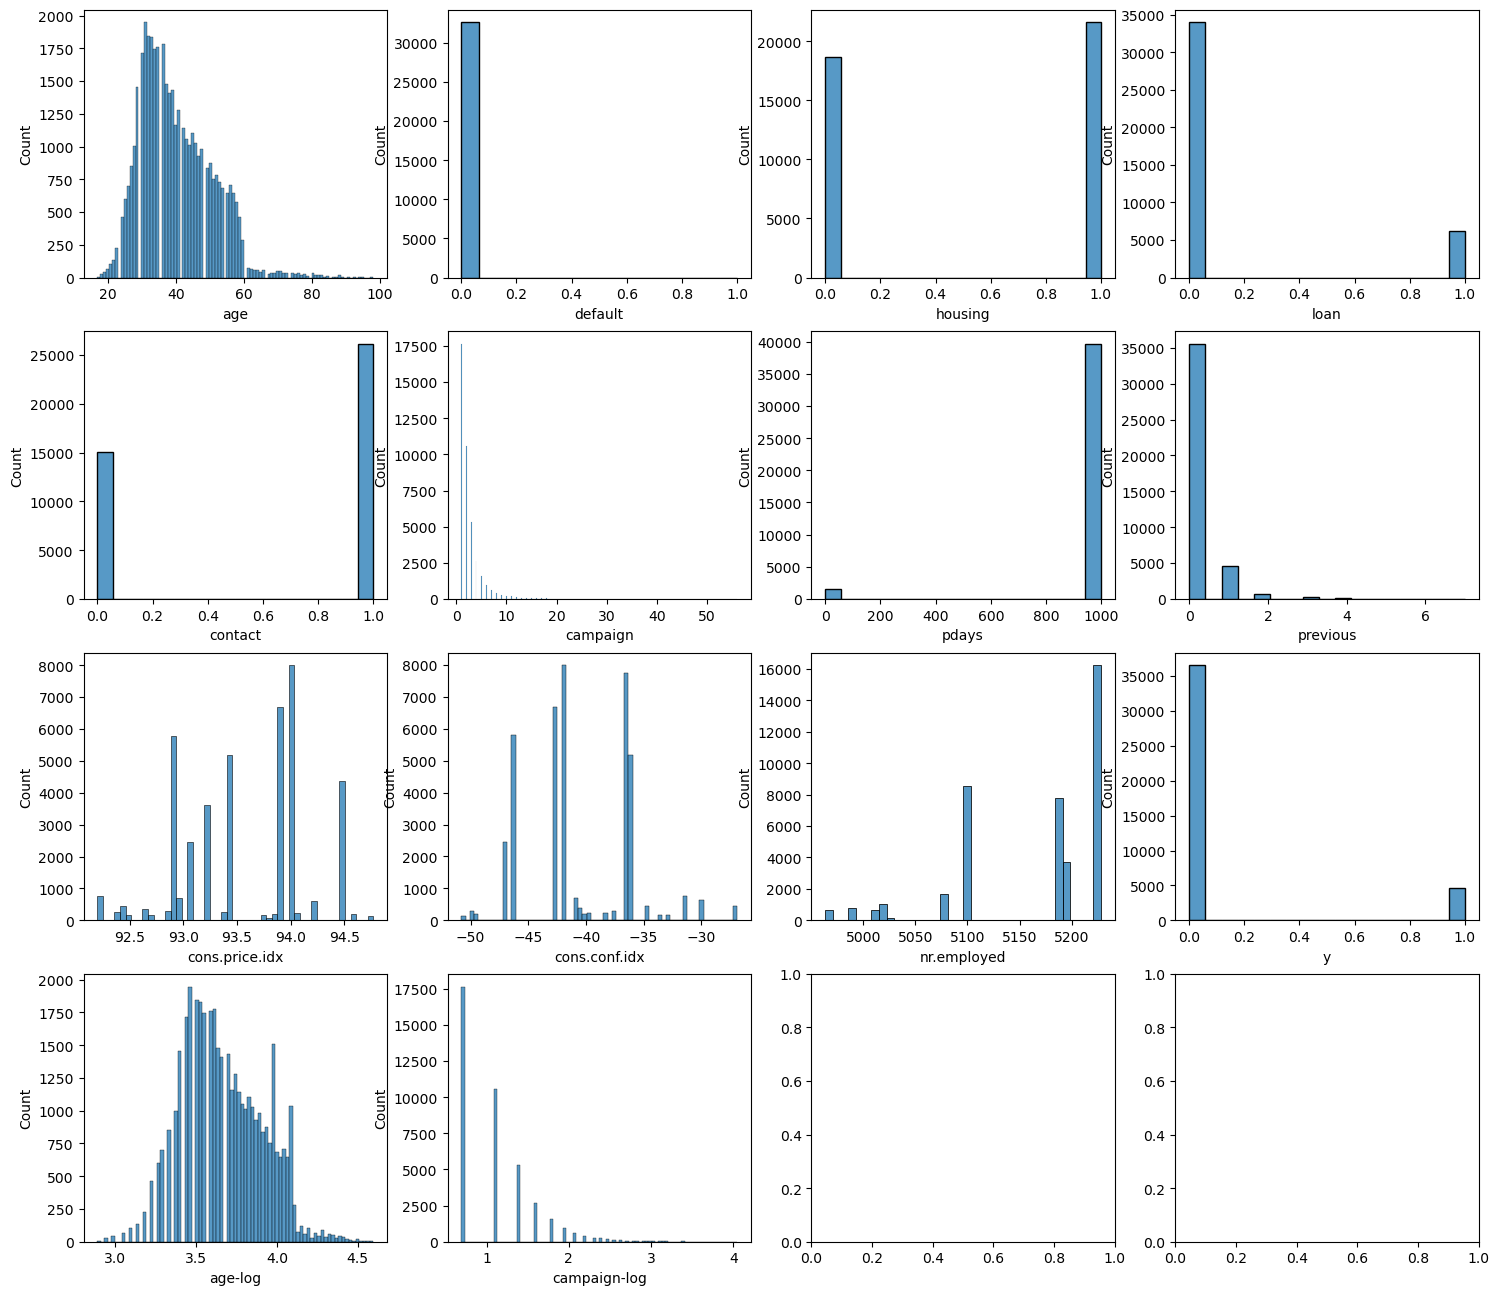

In [178]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate (cols_num):
    sns.histplot(df1[column],ax=axes[i//4,i%4],kde=False)

### balance de clases

In [179]:
pd.options.display.float_format='{:.2f}'.format

#### se revisa el porcentaje de cada variable con respesto al total para cada columna categorica

In [180]:
categ_columns=['job','marital','education','month','day_of_week','poutcome']
for column in categ_columns:
    helper = df1.groupby(column)[column].count().rename('total').reset_index()

    helper['percent']=(helper['total']/helper['total'].sum())*100
    print('\n' + column)
    print(helper)


job
              job  total  percent
0          admin.  10422    25.51
1     blue-collar   9254    22.65
2    entrepreneur   1456     3.56
3       housemaid   1060     2.59
4      management   2924     7.16
5         retired   1720     4.21
6   self-employed   1421     3.48
7        services   3969     9.71
8         student    875     2.14
9      technician   6743    16.50
10     unemployed   1014     2.48

marital
    marital  total  percent
0  divorced   4612    11.22
1   married  24928    60.64
2    single  11568    28.14

education
             education  total  percent
0             basic.4y   4176    10.58
1             basic.6y   2292     5.81
2             basic.9y   6045    15.32
3          high.school   9515    24.11
4           illiterate     18     0.05
5  professional.course   5243    13.29
6    university.degree  12168    30.84

month
  month  total  percent
0   apr   2632     6.39
1   aug   6178    15.00
2   dec    182     0.44
3   jul   7174    17.42
4   jun   5318  

#### job
    - Se ponen juntas aquellas opciones que tienen un valor menor al 5% en la categoria 'other'

In [181]:
df1['job'].replace({'entrepreneur':'other','housemaid':'other','retired':'other','self-employed':'other','student':'other','unemployed':'other'}, inplace=True)

#### education
    - Se elimina la oocion illiterate

In [182]:
df1['education']= df1['education'].astype('object')
df1.drop(df1[df1['education']=='illiterate'].index,inplace=True)
df1['education']= df1['education'].astype('category')

#### month
    - Se agrupan los meses en tres grupos (1,2,3) 

In [183]:
df1['month'].replace({'apr':1,'aug':2,'dec':3,'jul':2,'jun':2,'mar':1,'may':2,'nov':3,'oct':3,'sep':3}, inplace=True)

#### Marital y Poutcome

    - No se le realiza ningun cambio

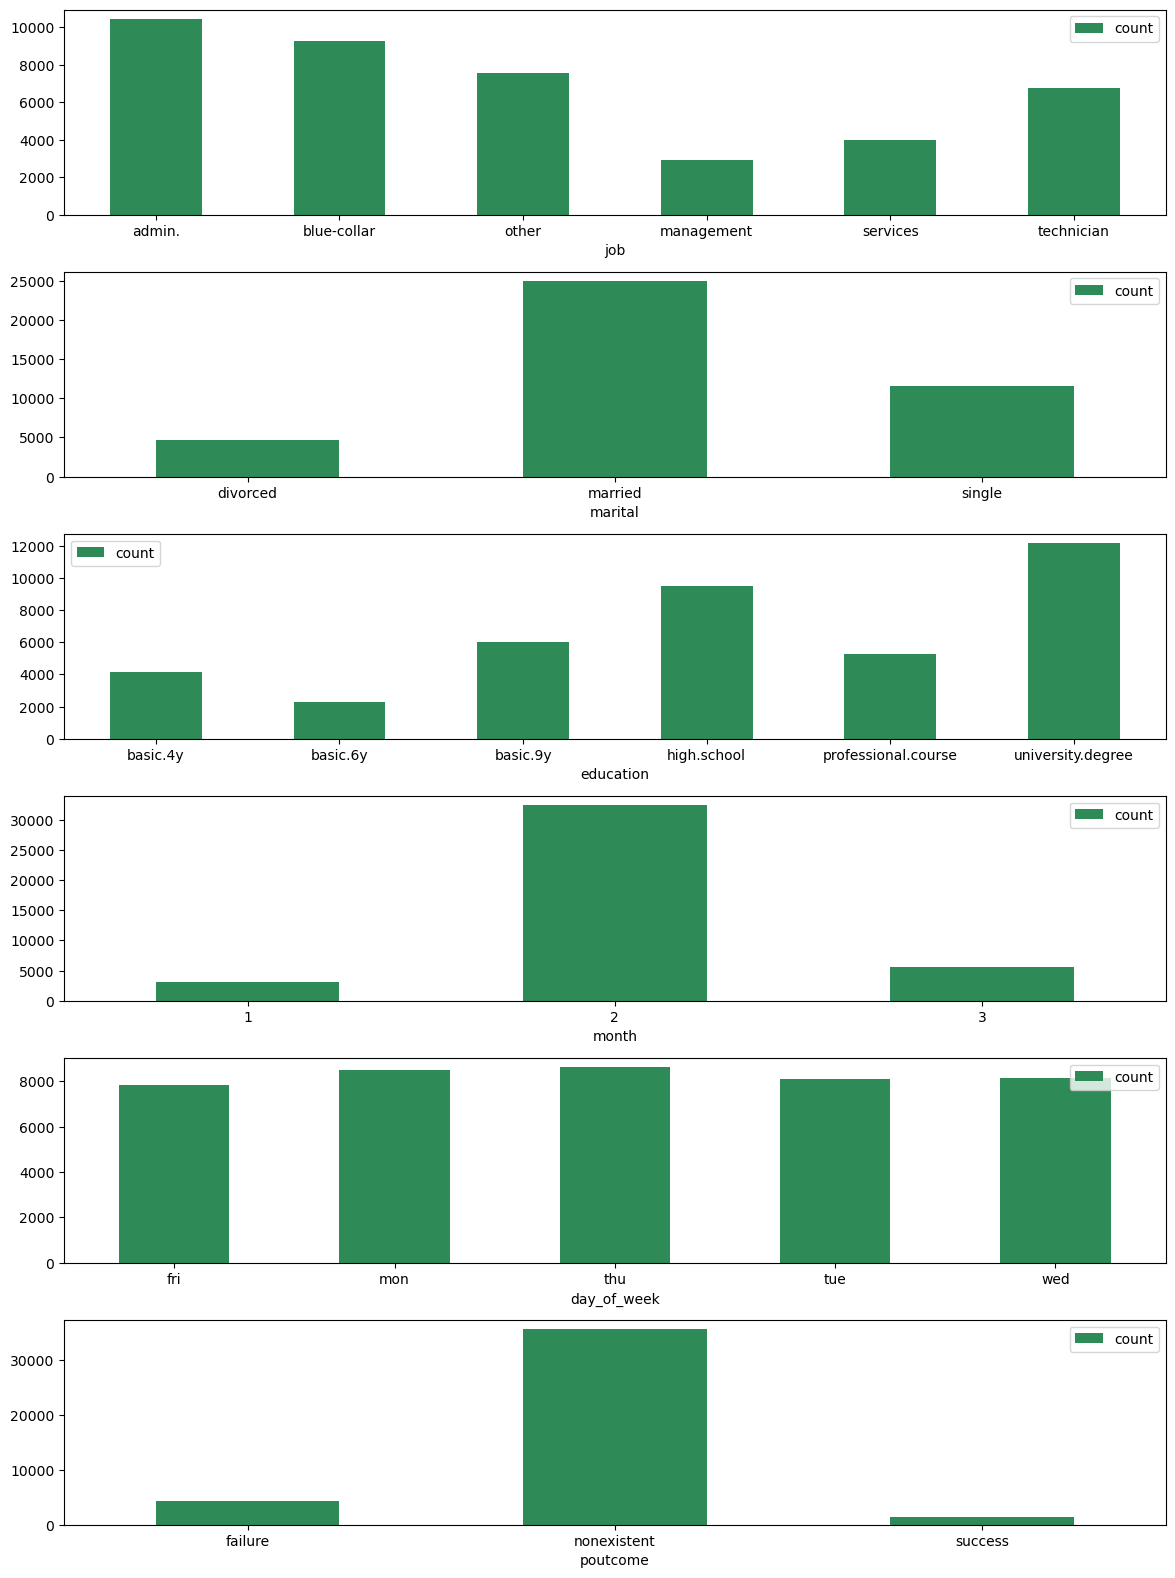

In [185]:
categ_columns=['job','marital','education','month','day_of_week','poutcome']

fig, axes = plt.subplots(nrows=6,ncols=1, figsize=(12,16))
fig.tight_layout(pad=2.0)
for i, column in enumerate (categ_columns):

    df_helper= df1.groupby(column)[column].count().rename('count').reset_index()
    df_helper.plot.bar(x=column,ax=axes[i],color='seagreen')
    axes[i].tick_params(labelrotation=360)

In [186]:
for column in categ_columns:
    helper = df1.groupby(column)[column].count().rename('total').reset_index()

    helper['percent']=(helper['total']/helper['total'].sum())*100
    print('\n' + column)
    print(helper)


job
           job  total  percent
0       admin.  10421    25.52
1  blue-collar   9246    22.64
2        other   7537    18.45
3   management   2924     7.16
4     services   3969     9.72
5   technician   6743    16.51

marital
    marital  total  percent
0  divorced   4610    11.22
1   married  24913    60.63
2    single  11567    28.15

education
             education  total  percent
0             basic.4y   4176    10.59
1             basic.6y   2292     5.81
2             basic.9y   6045    15.33
3          high.school   9515    24.13
4  professional.course   5243    13.29
5    university.degree  12168    30.85

month
  month  total  percent
0     1   3176     7.71
1     2  32426    78.76
2     3   5568    13.52

day_of_week
  day_of_week  total  percent
0         fri   7823    19.00
1         mon   8513    20.68
2         thu   8617    20.93
3         tue   8085    19.64
4         wed   8132    19.75

poutcome
      poutcome  total  percent
0      failure   4251    10.33
1  no

- Solo un valor quedó menor al 5% (3.33% success in putcome)

In [233]:
df2=df1.copy()

In [234]:
categ_columns=['job','marital','education','month','day_of_week','poutcome']
categ_variables = df2[categ_columns]
categ_dummies = pd.get_dummies(categ_variables, drop_first=True)
categ_dummies.head()

,job_blue-collar,job_other,job_management,job_services,job_technician,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,month_2,month_3,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0


In [235]:
df2 = df2.drop(categ_columns, axis=1)
df2 = pd.concat([df2, categ_dummies], axis=1)
df2.head()

,age,default,housing,loan,contact,campaign,pdays,previous,cons.price.idx,cons.conf.idx,...,education_professional.course,education_university.degree,month_2,month_3,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.00,0.00,0.00,0.00,1,999,0,93.99,-36.40,...,0,0,1,0,1,0,0,0,1,0
1,57,NaN,0.00,0.00,0.00,1,999,0,93.99,-36.40,...,0,0,1,0,1,0,0,0,1,0
2,37,0.00,1.00,0.00,0.00,1,999,0,93.99,-36.40,...,0,0,1,0,1,0,0,0,1,0
3,40,0.00,0.00,0.00,0.00,1,999,0,93.99,-36.40,...,0,0,1,0,1,0,0,0,1,0
4,56,0.00,0.00,1.00,0.00,1,999,0,93.99,-36.40,...,0,0,1,0,1,0,0,0,1,0


#### Se usa la funcion Iterative Imputer para imputar los valores nulos

In [253]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it = IterativeImputer()
df_to_test=pd.DataFrame(impute_it.fit_transform(df2),columns=df2.columns)

df_to_test.head()

,age,default,housing,loan,contact,campaign,pdays,previous,cons.price.idx,cons.conf.idx,...,education_professional.course,education_university.degree,month_2,month_3,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.00,0.00,0.00,0.00,0.00,1.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1,57.00,0.00,0.00,0.00,0.00,1.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,37.00,0.00,1.00,0.00,0.00,1.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,40.00,0.00,0.00,0.00,0.00,1.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,56.00,0.00,0.00,1.00,0.00,1.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [305]:
missing_values_count= df_to_test.isnull().sum().sum()

print("hay ", missing_values_count, "valores nulos en este dataset")

hay  0 valores nulos en este dataset


### Data Split

In [262]:
from sklearn.model_selection import train_test_split

X = df_to_test.drop('y',axis=1) #El array x (atributos) no va a contener la respuesta (num columnas x m)
y = df_to_test['y'] # Clase a predecir
#Se divide a X y Y en un ratio 70:30

# Convert categorical variables to dummy variables
# This will generate 467 additional columns

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [263]:
X_train.head(3)

,age,default,housing,loan,contact,campaign,pdays,previous,cons.price.idx,cons.conf.idx,...,education_professional.course,education_university.degree,month_2,month_3,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
4895,46.00,0.00,1.00,0.00,0.00,4.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
17063,56.00,0.00,1.00,0.00,1.00,4.00,999.00,0.00,93.92,-42.70,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7305,37.00,-0.00,1.00,1.00,0.00,3.00,999.00,0.00,93.99,-36.40,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [264]:
print('{0:0.2f}% data is in training set'.format((len(X_train)/len(df_to_test.index))*100))
print('{0:0.2f}% data is in test set'.format((len(X_test)/len(df_to_test.index))*100))

70.00% data is in training set
30.00% data is in test set


In [265]:
# Validacion de la estructura de los datasets
# En este caso la variable "Response" tiene 15/85 en cuanto a 1/0 y deberia perdurar en el Original, training y testing
# Esa es justamente la idea de hacer el split
print('Original Personal Loan True Values : {0} ({1:0.2f}%)'.format(len(df_to_test.loc[df_to_test['y']==1]),(len(df_to_test.loc[df_to_test['y']==1])/len(df_to_test.index))*100))
print('Original Personal Loan False Values : {0} ({1:0.2f}%)'.format(len(df_to_test.loc[df_to_test['y']==0]),(len(df_to_test.loc[df_to_test['y']==0])/len(df_to_test.index))*100))
print('')
print('Original Personal Loan True Values : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==1]),(len(y_train[y_train[:]==1])/len(y_train.index))*100))
print('Original Personal Loan False Values : {0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0])/len(y_train.index))*100))
print('')
print('Original Personal Loan True Values : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1])/len(y_test.index))*100))
print('Original Personal Loan False Values : {0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==0]),(len(y_test[y_test[:]==0])/len(y_test.index))*100))

Original Personal Loan True Values : 4636 (11.26%)
Original Personal Loan False Values : 36534 (88.74%)

Original Personal Loan True Values : 3248 (11.27%)
Original Personal Loan False Values : 25571 (88.73%)

Original Personal Loan True Values : 1388 (11.24%)
Original Personal Loan False Values : 10963 (88.76%)


#### Regresion logistica

In [266]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Adapta el modelo a los x_train y y_train (Entrenamiento)

model= LogisticRegression(class_weight={0:0.11,1:0.89}, solver="liblinear")
model.fit(X_train, y_train)

# Hace la prediccion en x_test y la guarda en y_predict

y_predict = model.predict(X_test)

In [267]:
# La prediccion no es mas que un conjunto de 0s y 1s que se aplican al mismo dataset
y_predict[0:100]

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

In [269]:
# Construye un dataset con el valor original y la prediccion

z= X_test.copy()
z['Response real']=y_test
z['Response prediccion']=y_predict
z[['Response real','Response prediccion']].head(10)

,Response real,Response prediccion
37604,0.00,1.00
30687,0.00,0.00
36985,0.00,1.00
29143,1.00,0.00
32278,0.00,0.00
838,0.00,0.00
17132,0.00,0.00
6897,0.00,0.00
28953,0.00,1.00
9427,0.00,0.00


In [307]:
# Genera los coeficientes de la ecuacion
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns
# Incluye el intercept
coef_df['intercept']=model.intercept_
coef_df.T.sort_values(by=0)

,0
age-log,-1.47
month_2,-0.80
month_3,-0.67
job_services,-0.21
job_blue-collar,-0.21
previous,-0.17
day_of_week_mon,-0.12
campaign,-0.07
loan,-0.05
housing,-0.05


In [272]:
# Armar los valores de cada prediccion

### Matriz de Confusion

- Entender Falsos positivos, Falsos negativos

- Medidas de precision de modelos

Text(0.5, 1.0, 'Matriz de confusion')

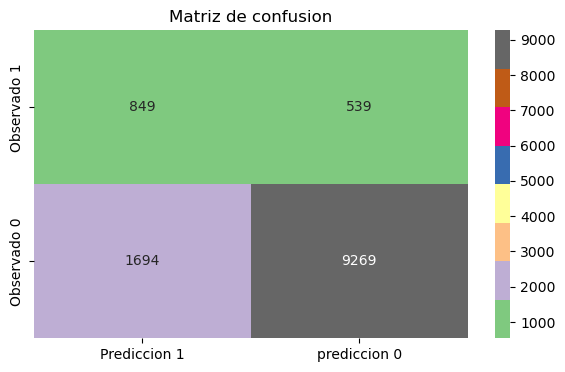

In [273]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm= pd.DataFrame(cm,index=[i for i in['Observado 1','Observado 0']],
                    columns = [i for i in['Prediccion 1','prediccion 0']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm,annot=True, cmap='Accent',fmt='d').set_title('Matriz de confusion')

In [274]:
df_cm

,Prediccion 1,prediccion 0
Observado 1,849,539
Observado 0,1694,9269


In [275]:
# Un TP es un valor que fue observado y predicho como positivo
# Un TN es un valor que fue observado y predicho como negativo
# Un FP es un valor que fue observado como negarivo pero predicho como positivo
# Un FN es un valor que fue observado como positivo pero predicho como negativo


TP= df_cm.iloc[0][0]
FP= df_cm.iloc[0][1]
FN= df_cm.iloc[1][0]
TN= df_cm.iloc[1][1]

print('TP =',TP,'FP =',FP,'FN =',FN,'TN =',TN)

TP = 849 FP = 539 FN = 1694 TN = 9269


In [277]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
precision_score = precision_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)

print('Medidas del Modelo')
print('________')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_test,y_predict)))

Medidas del Modelo
________
Accuracy = 0.82
Precision = 0.33
Recall = 0.61
F1 Score = 0.43
Roc Auc Score = 0.73


- La exactitud (acuracy) de este modelo  representa el porcentaje de predicciones correctas frente al total. Para este caso laexactitud fue del 82%
- la presición del modelo es mucho más baja (0.33) y se refiere a lo cerca que esta el modelo de predecir un valor verdadero.
- La sensibilidad (recall) es la proporcion entre los casos positivos bien clasificados por el modelo, respecto al total de positivos.
para nuestro modelo esto equivale al 61% de lo que se podría decir que nuestro algoritmo de clasificación es medianamente sensible.



In [279]:
# Create a dataframe with the predicion, y_hats
y_hats = pd.DataFrame(y_pred)

# Resets index fory_test
df_out = y_test.reset_index()
df_out['Actual']=y_test.reset_index()['y']
df_out['Prediction']=y_hats.reset_index()[0]
df_out.drop('index', axis=1, inplace=True)

df_out = df_out[df_out['Actual']!=df_out['Prediction']]
print(len(df_out),'registros donde lo observado <> predicho')

2233 registros donde lo observado <> predicho


In [280]:
df_out

,y,Actual,Prediction
0,0.00,0.00,1.00
2,0.00,0.00,1.00
3,1.00,1.00,0.00
8,0.00,0.00,1.00
12,1.00,1.00,0.00
...,...,...,...
12304,0.00,0.00,1.00
12318,0.00,0.00,1.00
12320,0.00,0.00,1.00
12322,0.00,0.00,1.00
